In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train_path = './datasets/Simulated-Credit-Card-Transactions-generated-using-Sparkov/df_train_preprocessed.csv'
df = pd.read_csv(data_train_path)
df.head()

df_fraud = df[df.is_fraud==1]

print(df.shape)
print(df_fraud.shape)

(1296675, 33)
(7506, 33)


# EDA

## Plot: gender, top-10 cities vs fraud

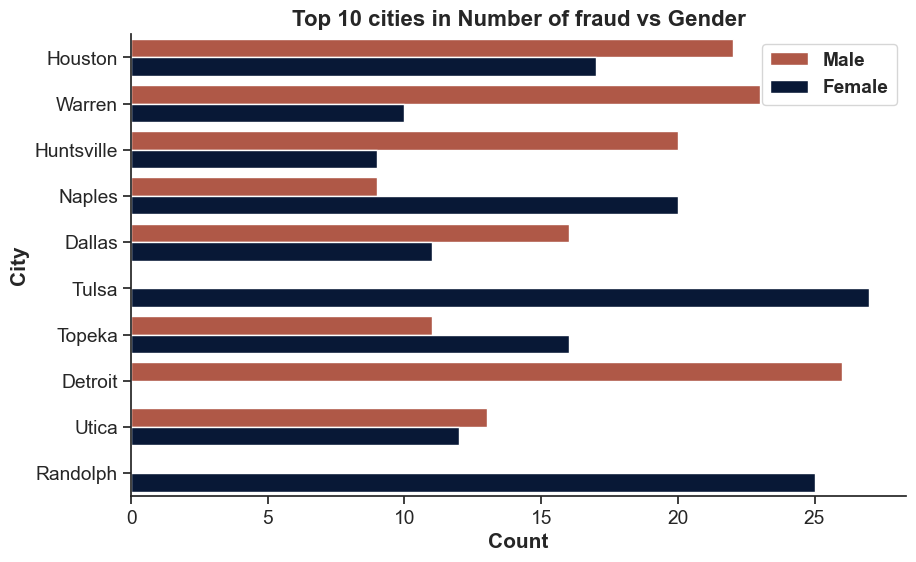

In [69]:
fig = plt.figure(figsize=(10,6))
# sns.set()
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.countplot(y = 'city',
                  data=df_fraud, 
                  hue='gender',
                  width=0.8,
                  order=df_fraud.city.value_counts(sort=True, ascending=False).head(10).index)

# Set title, label, legend 
g.set_title('Top 10 cities in Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Top 10 cities in Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

# Analysis of fraud per gender

   gender   count  Number of fraud  Fraud ratio
0  Female  709863             3735         0.53
1    Male  586812             3771         0.64


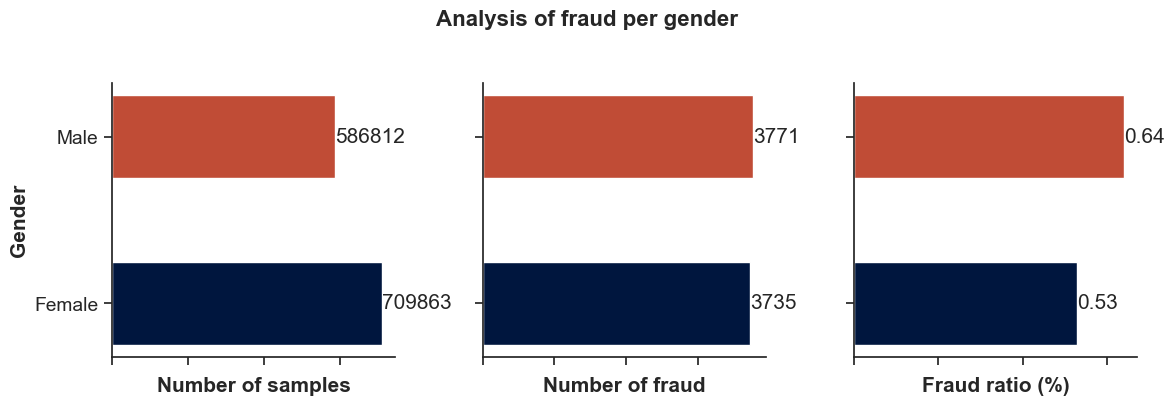

In [266]:
df_gender_is_fraud = df[['gender', 'is_fraud']]
df_gender_is_fraud = df_gender_is_fraud.groupby(['gender']).agg(['count', 'sum', 'mean',])
df_gender_is_fraud.columns = ['count', 'Number of fraud', 'Fraud ratio']
df_gender_is_fraud.reset_index(inplace=True)
df_gender_is_fraud["Fraud ratio"] = df_gender_is_fraud["Fraud ratio"].apply(lambda x: round(x*100, 2))
print(df_gender_is_fraud)

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
colors = ["#00163E", "#C04C36"]
ax1.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['count'], 
         color=colors,
         height=0.5,)
ax1.set_ylabel("Gender", weight='bold', fontsize=15)
ax1.set_xlabel('Number of samples', weight='bold', fontsize=15)
ax1.bar_label(ax1.containers[0], label_type='edge')
ax1.set_xticklabels([])

ax2.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Number of fraud'], 
         color=colors,
         height=0.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('Number of fraud', weight='bold', fontsize=15)
ax2.bar_label(ax2.containers[0], label_type='edge')

ax3.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Fraud ratio'], 
         color=colors,
         height=0.5)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlabel('Fraud ratio (%)', weight='bold', fontsize=15)
ax3.bar_label(ax3.containers[0], label_type='edge')

fig.suptitle("Analysis of fraud per gender", weight='bold', fontsize=16, y=1.02)
fig.tight_layout()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Analysis of fraud per gender.png',dpi=300, bbox_inches='tight')

# plot category & gender vs fraud

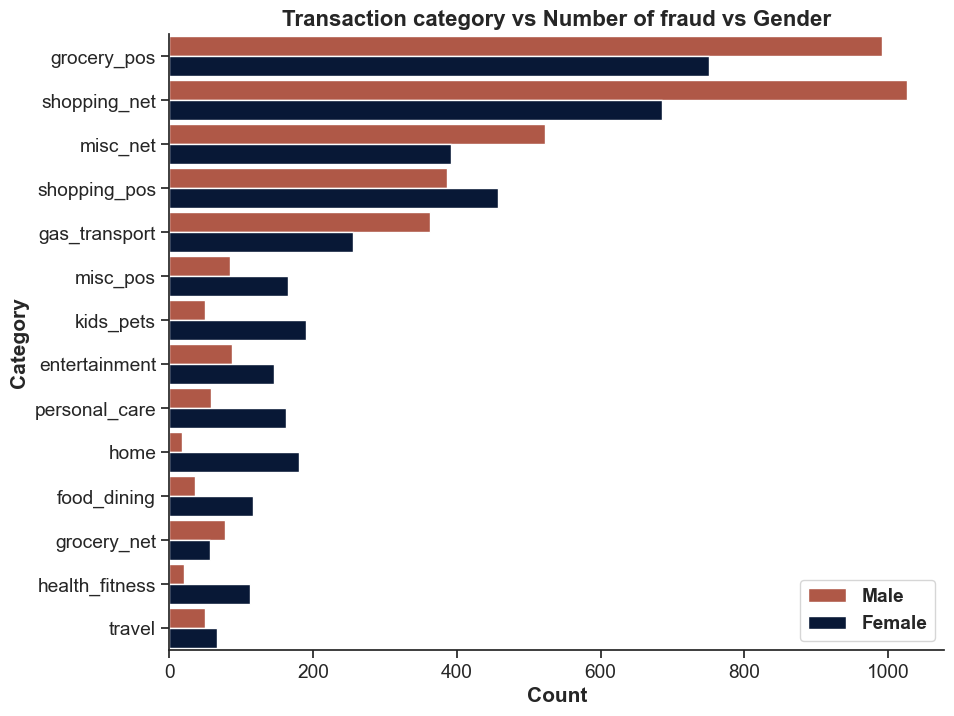

In [74]:
fig = plt.figure(figsize=(10,8))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.countplot(y = 'category',
                  data=df_fraud, 
                  hue='gender',
                  width=0.9,
                  order=df_fraud.category.value_counts().index, 
                  )

# Set title, label, legend 
g.set_title('Transaction category vs Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction category vs Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

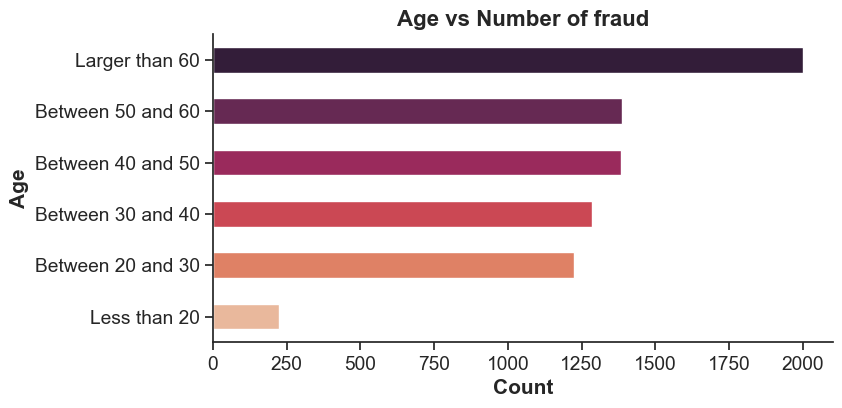

In [102]:
age_order = ['Larger than 60', 'Between 50 and 60', 'Between 40 and 50', 'Between 30 and 40', 'Between 20 and 30', 'Less than 20']

fig = plt.figure(figsize=(8,4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette("rocket"))


# Create count plot with region on the y-axis
g = sns.countplot(y='age_intervals',
                  data=df_fraud, 
                  order=age_order,
                  width=0.5,)

# Set title, label, legend 
g.set_title('Age vs Number of fraud', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Age vs Number of fraud.png',dpi=300, bbox_inches='tight')

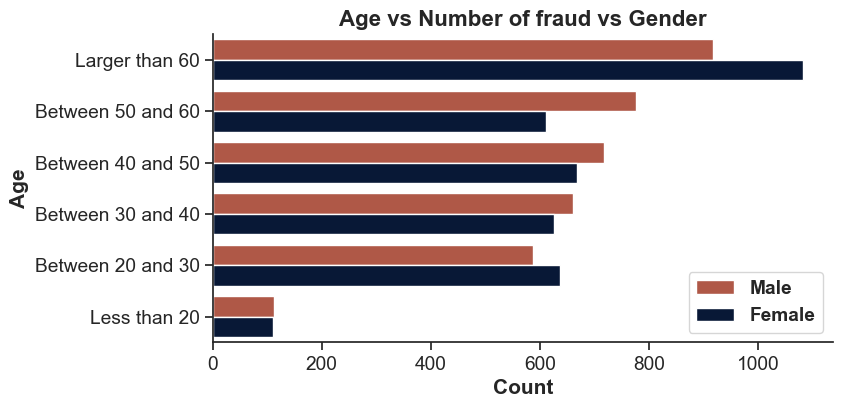

In [94]:
fig = plt.figure(figsize=(8,4))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.countplot(y = 'age_intervals',
                   data=df_fraud, 
                   hue='gender',
                   order=age_order,
                  width=0.8,
                 )

# Set title, label, legend 
g.set_title('Age vs Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Age', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Age vs Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

## Number of fraud per month

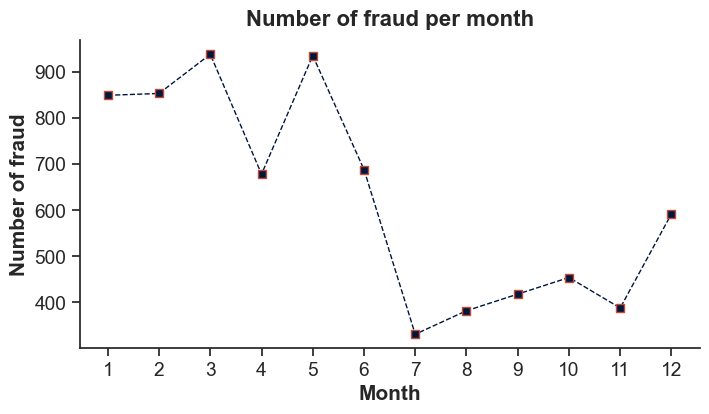

In [169]:
# Create df for number of fraud per month
count_fraud_month = df_fraud.transaction_month.value_counts()
count_fraud_month_df = pd.DataFrame(count_fraud_month).reset_index()
count_fraud_month_df.rename(columns={"index": "month", "transaction_month":"Number of fraud"}, inplace=True)
count_fraud_month_df_sort = count_fraud_month_df.sort_values('month', ascending=True)

# Plot
fig = plt.figure(figsize=(8,4))
plt.plot(count_fraud_month_df_sort.month, 
         count_fraud_month_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


# Set title, label, legend 
plt.xlabel("Month", weight='bold', fontsize=15)
plt.ylabel('Number of fraud', weight='bold', fontsize=15)
plt.title("Number of fraud per month", weight='bold', fontsize=16, y=1.02)
plt.xticks(range(1,13,1))

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Month vs Number of fraud.png',dpi=300, bbox_inches='tight')

## Number of fraud per hour

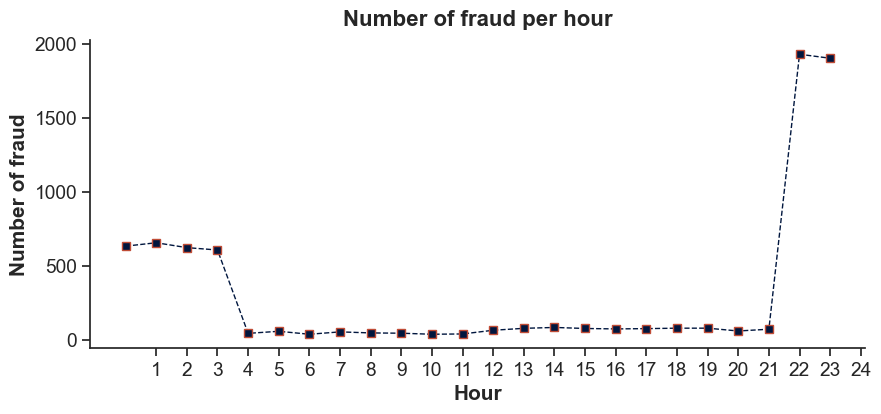

In [170]:
# Create df for number of fraud per hour
count_fraud_hour = df_fraud.transaction_hour.value_counts()
count_fraud_hour_df = pd.DataFrame(count_fraud_hour).reset_index()
count_fraud_hour_df.rename(columns={"index": "hour", "transaction_hour":"Number of fraud"}, inplace=True)
count_fraud_hour_df_sort = count_fraud_hour_df.sort_values('hour', ascending=True)

fig = plt.figure(figsize=(10,4))
plt.plot(count_fraud_hour_df_sort.hour, 
         count_fraud_hour_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


# Set title, label, legend 
plt.xlabel("Hour", weight='bold', fontsize=15)
plt.ylabel('Number of fraud', weight='bold', fontsize=15)
plt.title("Number of fraud per hour", weight='bold', fontsize=16, y=1.02)
plt.xticks(range(1,25,1))

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction hour vs Number of fraud.png',dpi=300, bbox_inches='tight')

# Distribution of fraud transaction amount per age group

<Figure size 800x400 with 0 Axes>

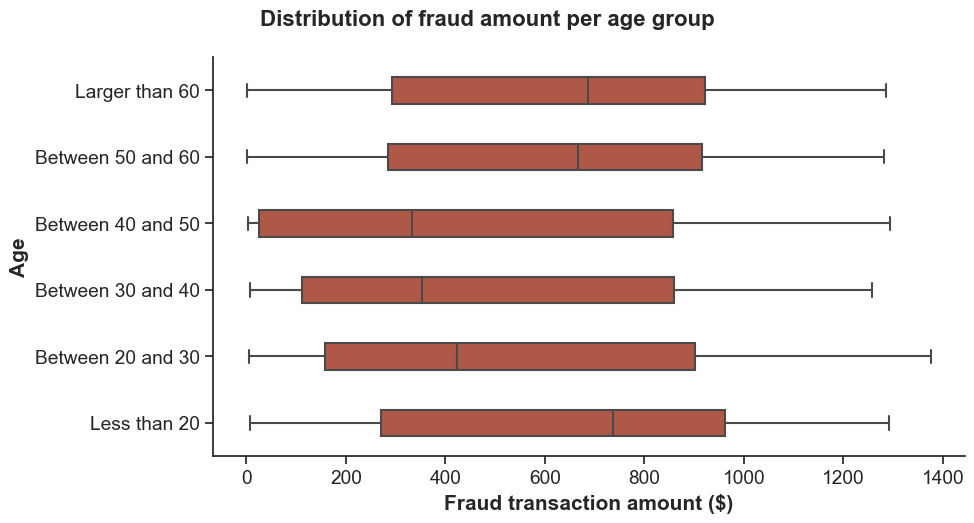

In [277]:
fig = plt.figure(figsize=(8,4))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)

# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df_fraud, 
                order=age_order,
                width=0.4,
                kind='box', 
                aspect=2, 
                color='#C04C36')

g.fig.suptitle('Distribution of fraud amount per age group', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Fraud transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')
# sb.set(xticks=[0, 250, 500, 750, 1000, 1500])

# Show plot
plt.show()

g.figure.savefig('./figs/Fraud transaction amount vs Age.png',dpi=300, bbox_inches='tight')

## Distribution of fraud amount per age group & gender

<Figure size 1000x600 with 0 Axes>

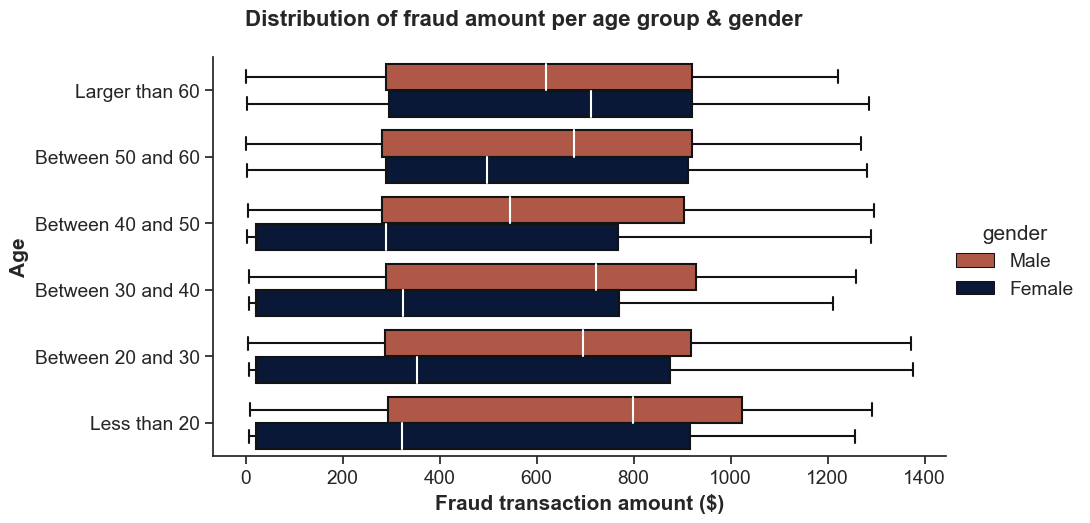

In [290]:
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df_fraud, 
                hue='gender',
                width=0.8,
                order=age_order,
                kind='box', 
                medianprops={"color": "w"},
                aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution of fraud amount per age group & gender', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Fraud transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Fraud transaction amount vs Age vs Gender.png',dpi=300, bbox_inches='tight')

## Distribution of transaction amount per age group & fraud label

<Figure size 1000x600 with 0 Axes>

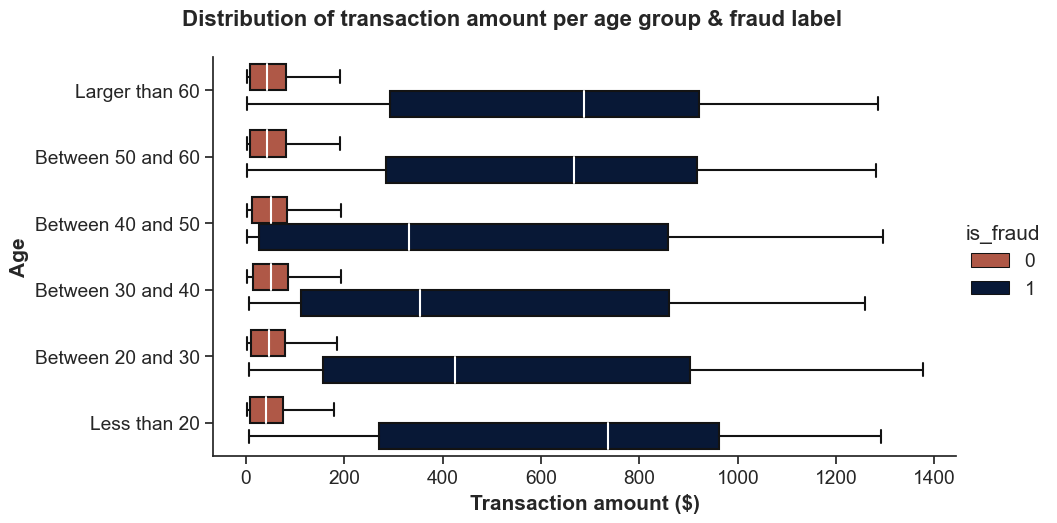

In [314]:
# Set figure
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df, 
                hue='is_fraud',
                order=age_order,
                kind='box',
                medianprops={"color": "w"},
                sym='', 
                width=0.8,
                aspect=2,
                legend=True
           );
# Set title, label, legend 
g.fig.suptitle('Distribution of transaction amount per age group & fraud label', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show();

g.figure.savefig('./figs/Transaction amount vs Age vs Is fraud.png',dpi=300, bbox_inches='tight')

## Distribution of transaction distance per age group & fraud label

<Figure size 1000x600 with 0 Axes>

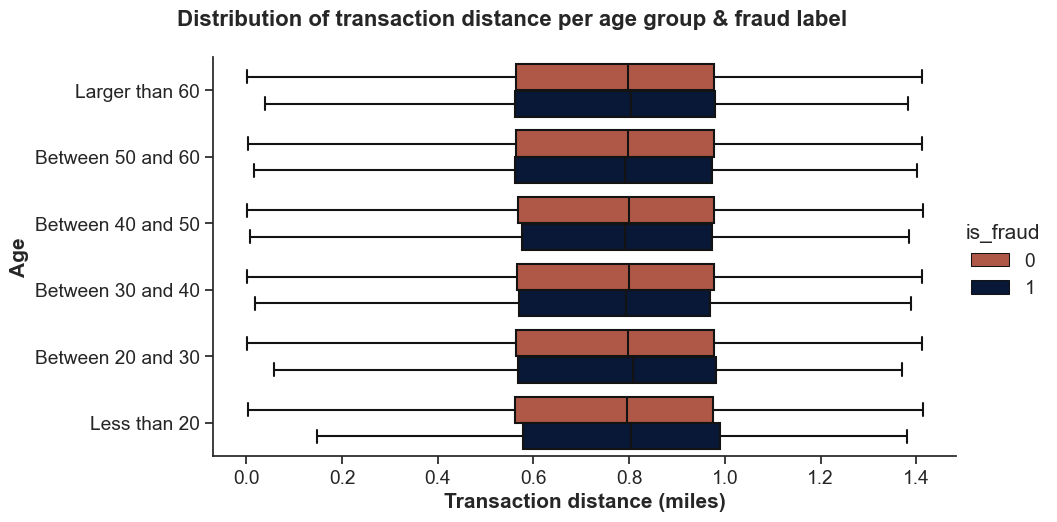

In [315]:
# Set figure
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
            x = "transaction_distance",
            data=df, 
            hue='is_fraud',
            order=age_order,
                width=0.8,
            kind='box',
            sym='', 
            aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution of transaction distance per age group & fraud label', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction distance vs Age vs Is fraud.png',dpi=300, bbox_inches='tight')

## Distribution of transaction distance with fraud per age group & gender

<Figure size 1000x600 with 0 Axes>

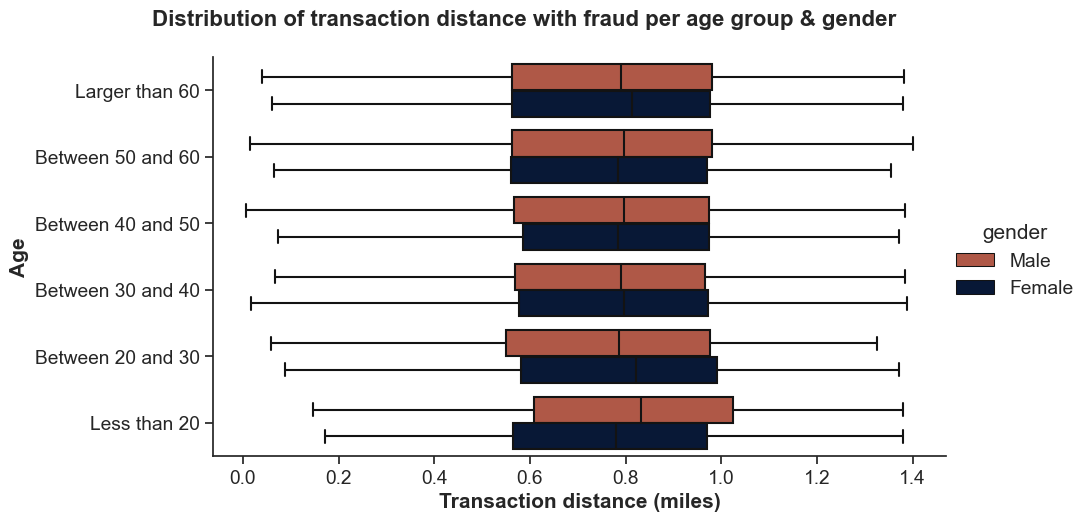

In [317]:
# Set figure
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)


# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
                x = "transaction_distance",
                data=df_fraud, 
                hue='gender',
                order=age_order,
                width=0.8,
                kind='box',
                sym='',
                aspect=2
           )

# Set title, label, legend 
g.fig.suptitle('Distribution of transaction distance with fraud per age group & gender', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction distance with fraud vs Age vs Gender.png',dpi=300, bbox_inches='tight')

## Distribution for transaction amount with fraud

<Figure size 1000x600 with 0 Axes>

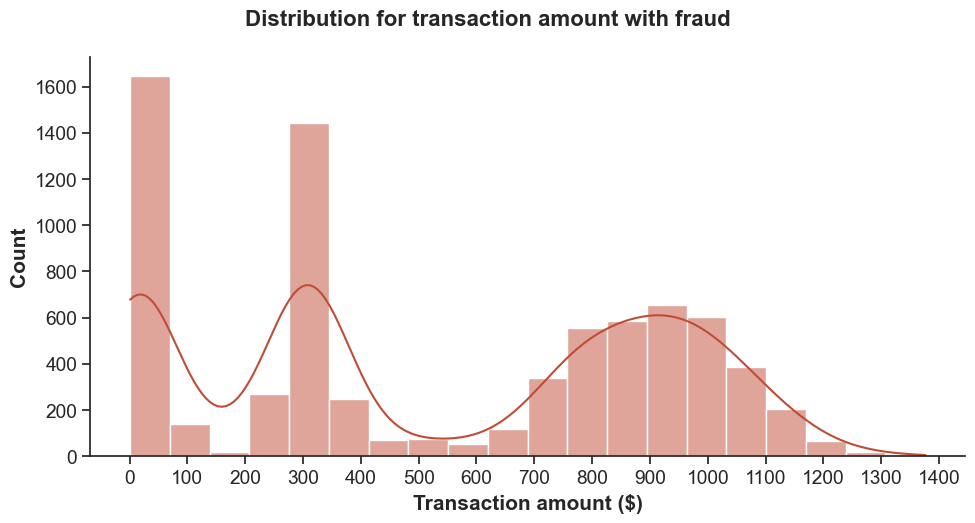

In [319]:
# Set the default seaborn style
plt.figure(figsize=(10,6))

colors = ['#C04C36']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a distplot
g = sns.displot(df_fraud['transaction_amount'],
                kde=True,
                bins=20, 
                aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution for transaction amount with fraud', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1401,100)))

# Show plot
plt.show()

g.figure.savefig('./figs/Distribution for Transaction amount with Fraud.png',dpi=300, bbox_inches='tight')

## Distribution for Transaction distance with fraud

<Figure size 1000x600 with 0 Axes>

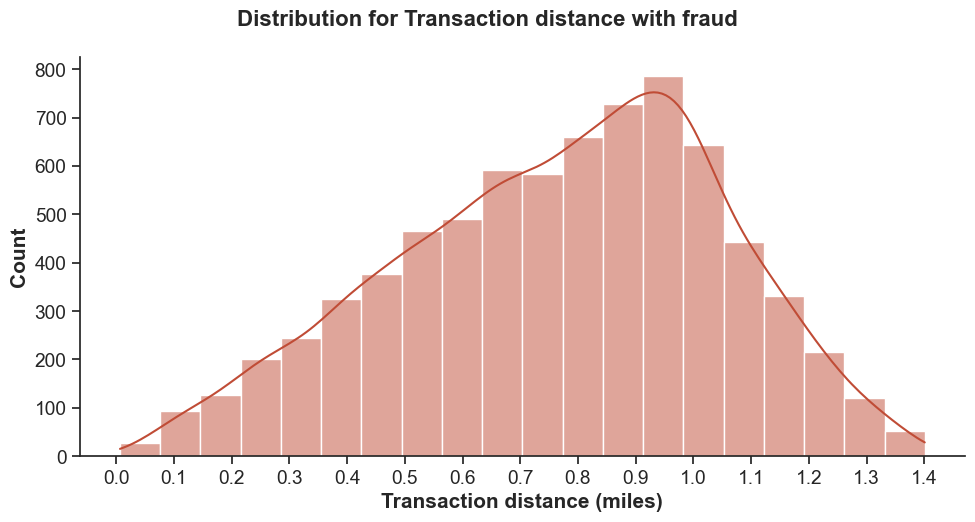

In [320]:
# Set seaborn style
plt.figure(figsize=(10,6))

colors = ['#C04C36']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a distplot
g = sns.displot(df_fraud['transaction_distance'],
                kde=True,
                bins=20, 
                aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution for Transaction distance with fraud', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1.41, 0.1)))

# Show plot
plt.show()

g.figure.savefig('./figs/Distribution for Transaction distance with Fraud.png',dpi=300, bbox_inches='tight')


## Transaction amount with fraud per category & gender

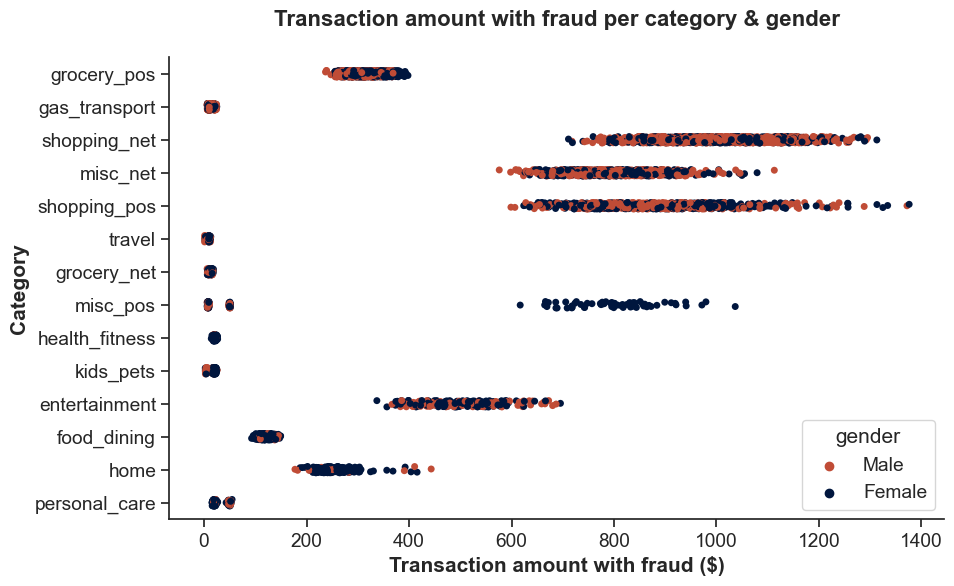

In [321]:
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.stripplot(data=df_fraud,
                  x='transaction_amount',
                  y='category',
                  hue='gender',
                  jitter=True)

# Set title, label, legend 
g.set_title('Transaction amount with fraud per category & gender', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Category vs Gender.png',dpi=300, bbox_inches='tight')

## Transaction amount with fraud per gender

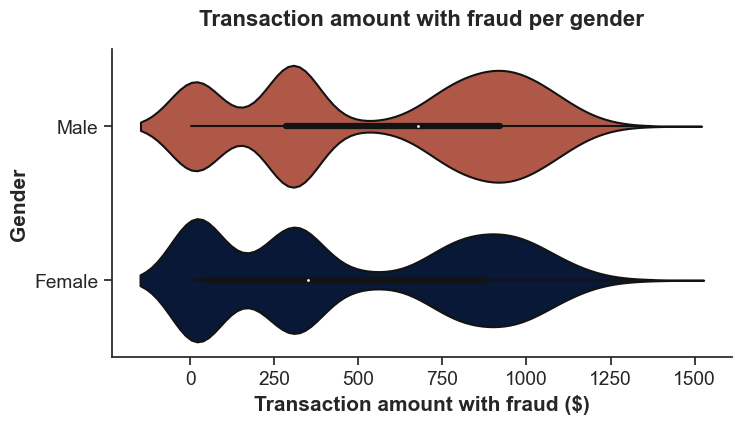

In [323]:
plt.figure(figsize=(8,4))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create the stripplot
g = sns.violinplot(data=df_fraud,
                   x='transaction_amount',
                   y='gender',
#               palette='husl'
             )

# Set title, label, legend 
g.set_title('Transaction amount with fraud per gender', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Gender', fontsize=15, fontweight='bold')

plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Gender.png',dpi=300, bbox_inches='tight')

## Average transaction amount with fraud per category

In [335]:
df_cat_amount = df_fraud[['category','transaction_amount']].groupby('category').mean()

In [339]:
type(df_cat_amount)

pandas.core.frame.DataFrame

In [343]:
df_cat_amount.transaction_amount.sort_values(ascending=False).index

Index(['shopping_net', 'shopping_pos', 'misc_net', 'entertainment',
       'grocery_pos', 'home', 'misc_pos', 'food_dining', 'personal_care',
       'health_fitness', 'kids_pets', 'gas_transport', 'grocery_net',
       'travel'],
      dtype='object', name='category')

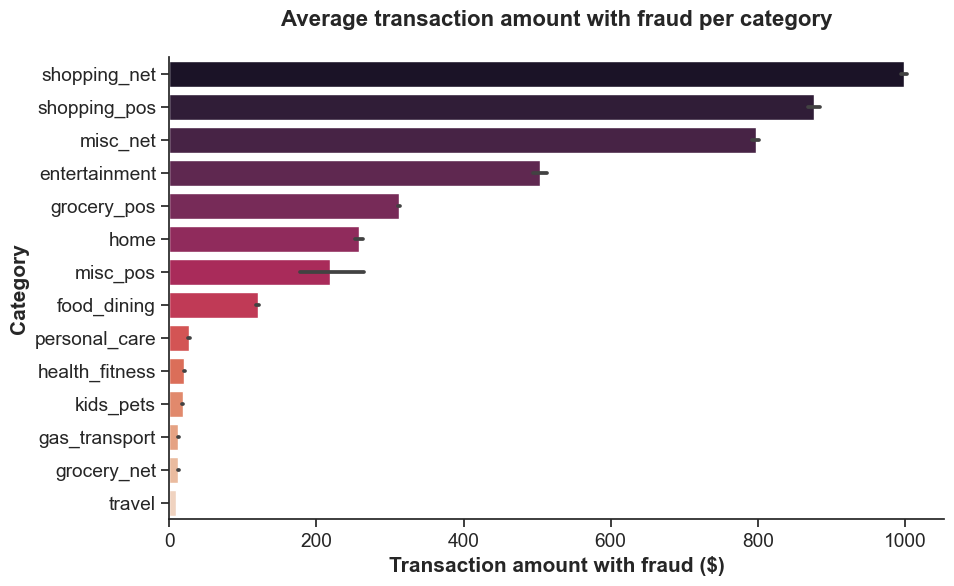

In [352]:
fig = plt.figure(figsize=(10,6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)

# Create the stripplot
g = sns.barplot(data=df_fraud,
                x='transaction_amount',
                y='category', 
                width=0.8,
#                 color='#C04C36',
                order=df_cat_amount.transaction_amount.sort_values(ascending=False).index,
              palette='rocket'

             )

# Set title, label, legend 
g.set_title('Average transaction amount with fraud per category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Category.png',dpi=300, bbox_inches='tight')

## Average transaction amount per category & fraud label

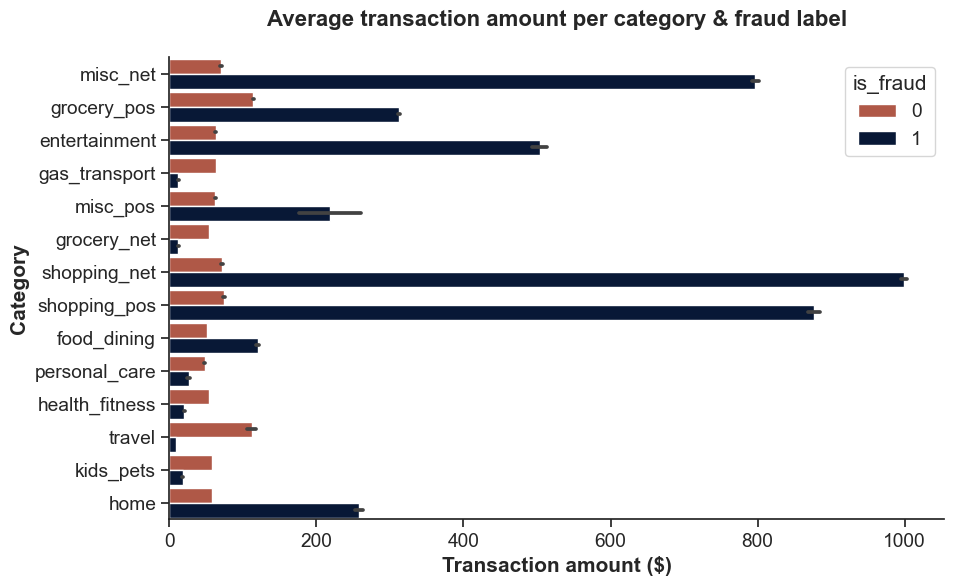

In [354]:
plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create the stripplot
g = sns.barplot(data=df,
                x='transaction_amount',
                y='category', 
                hue='is_fraud',
                width=0.9,
             )

# Set title, label, legend 
g.set_title('Average transaction amount per category & fraud label', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

plt.show()

g.figure.savefig('./figs/Transaction amount vs Category vs Is fraud.png',dpi=300, bbox_inches='tight')

In [355]:
age_order

['Larger than 60',
 'Between 50 and 60',
 'Between 40 and 50',
 'Between 30 and 40',
 'Between 20 and 30',
 'Less than 20']

In [356]:
# inverse age list
# age_order.reverse()
# print(age_order)



Index(['Larger than 60', 'Between 50 and 60', 'Between 40 and 50',
       'Between 30 and 40', 'Between 20 and 30', 'Less than 20'],
      dtype='object', name='age_intervals')

## Fraud count vs Age vs Category

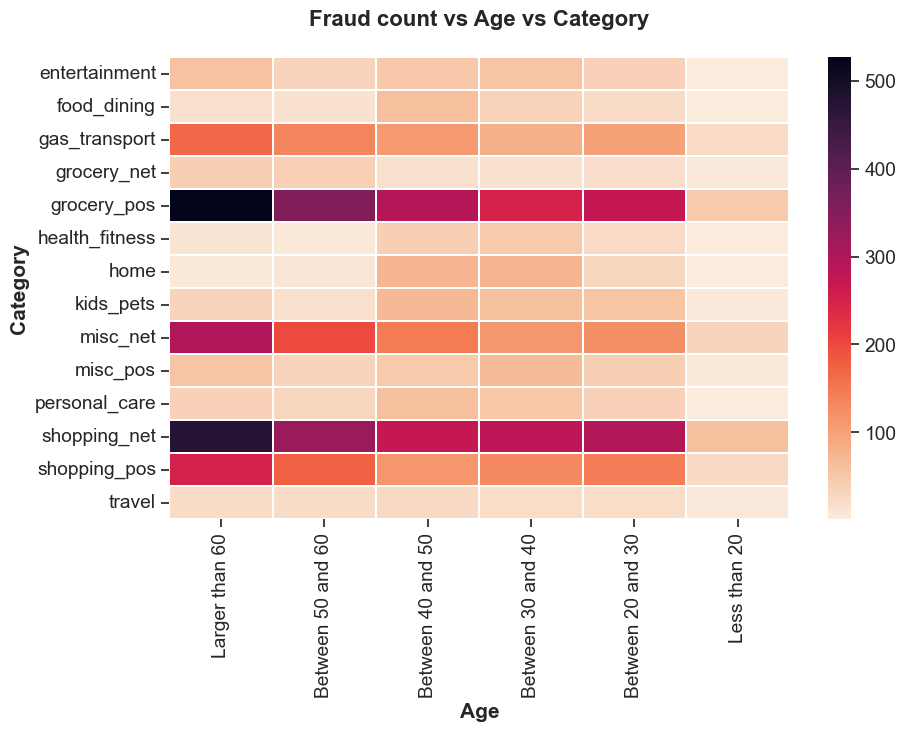

In [365]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["age_intervals"])
pd_crosstab_ordered = pd_crosstab[age_order]
pd_crosstab_ordered.columns

plt.figure(figsize=(10,6))

cmap = sns.cm.rocket_r
# colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
# sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_ordered, 
                cbar=True, 
                cmap=cmap, 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Age vs Category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Age', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()
g.figure.savefig('./figs/Fraud count vs Age vs Category.png',dpi=300, bbox_inches='tight')

## Fraud count vs Month vs Category

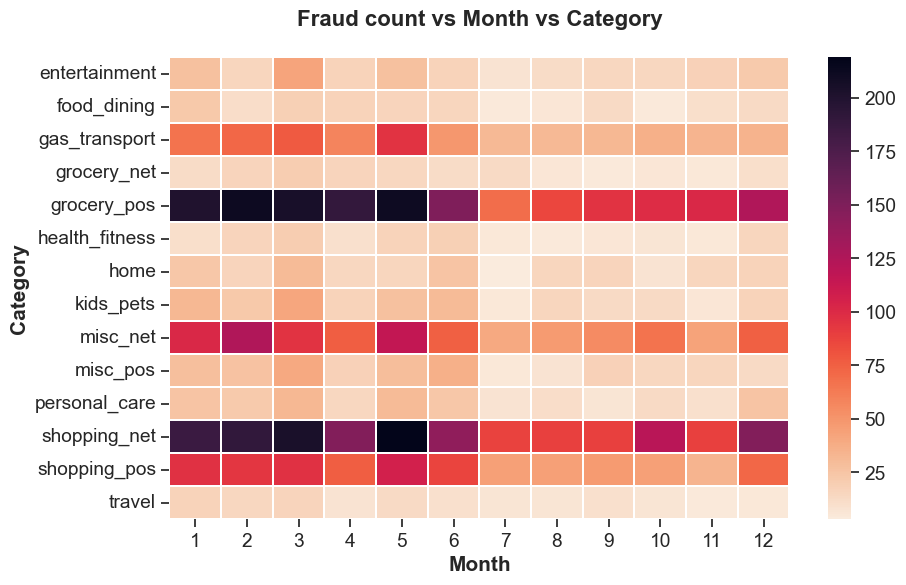

In [364]:
# Create a crosstab table of the data
pd_crosstab_month_cat = pd.crosstab(df_fraud["category"], df_fraud["transaction_month"])
pd_crosstab_month_cat

plt.figure(figsize=(10,6))
cmap = sns.cm.rocket_r
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)


# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_month_cat, 
                cbar=True, 
                cmap=cmap, 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Month vs Category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Month', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.show()
g.figure.savefig('./figs/Fraud count vs Month vs Category.png',dpi=300, bbox_inches='tight')

## Fraud count vs Hour vs Category

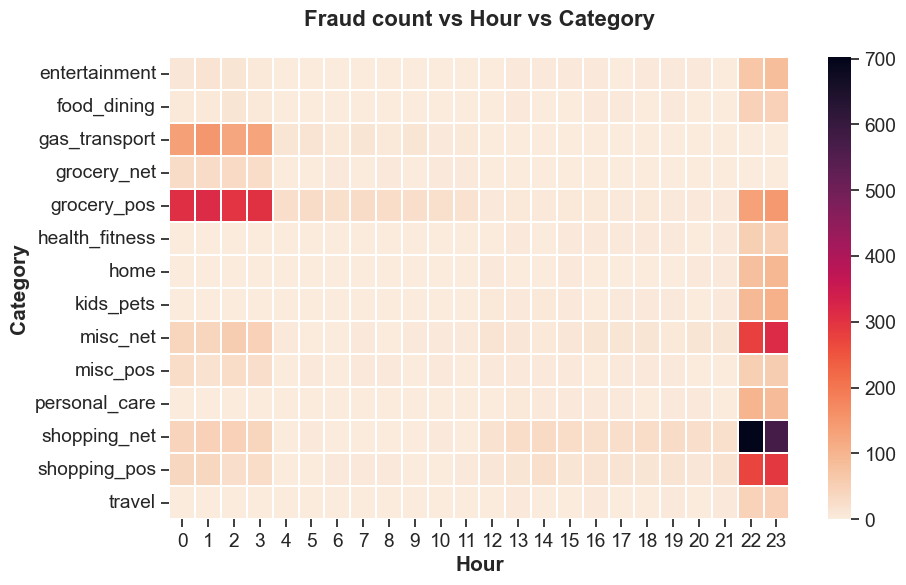

In [363]:
# Create a crosstab table of the data
pd_crosstab_hour_cat = pd.crosstab(df_fraud["category"], df_fraud["transaction_hour"])
pd_crosstab_hour_cat

plt.figure(figsize=(10,6))
cmap = sns.cm.rocket_r
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_hour_cat, 
                cbar=True, 
                cmap=cmap, 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Hour vs Category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Hour', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.show()
g.figure.savefig('./figs/Fraud count vs Hour vs Category.png',dpi=300, bbox_inches='tight')

In [366]:
df_quantile = df_fraud.sort_values('transaction_amount', ascending=True)
percentage_list = np.arange(0,1.01,0.01)

amount_quantile = df_quantile.transaction_amount.quantile(percentage_list)

df_ecdf = pd.DataFrame({"amount_quantile": amount_quantile, "percentage_list":percentage_list}, index=percentage_list)

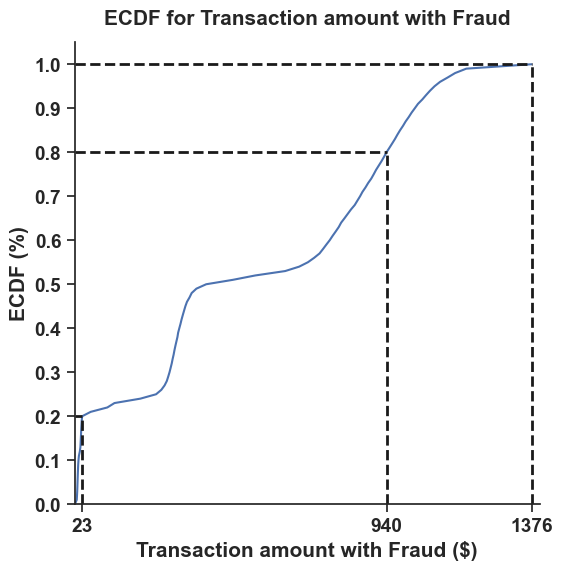

In [367]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(df_ecdf.amount_quantile, df_ecdf.percentage_list)

quantile_20 = df_ecdf.loc[0.20, 'amount_quantile']
quantile_80 = df_ecdf.loc[0.80, 'amount_quantile']
quantile_100 = df_ecdf.loc[1.0, 'amount_quantile']

ax.hlines([0.20], xmin=0, xmax=quantile_20, linestyles='--', color='k', linewidth=2)
ax.vlines([quantile_20], ymin=0, ymax=0.20, linestyles='--', color='k', linewidth=2)

ax.vlines([quantile_80], ymin=0, ymax=0.8, linestyles='--', color='k', linewidth=2)
ax.hlines([0.80], xmin=0, xmax=quantile_80, linestyles='--', color='k', linewidth=2)


ax.vlines([quantile_100], ymin=0, ymax=1.0, linestyles='--', color='k', linewidth=2)
ax.hlines([1.0], xmin=0, xmax=quantile_100, linestyles='--', color='k', linewidth=2)


ax.set_yticks(np.arange(0, 1.1, step=0.1), weight = 'bold')
ax.set_xticks([quantile_20, quantile_80, quantile_100], 
              labels=[str(round(quantile_20)), str(round(quantile_80)), str(round(quantile_100))], 
#               rotation=20, 
              weight = 'bold')

ax.set_ylim([0,1.05])
ax.set_xlim([0,1400])
ax.set_xlabel('Transaction amount with Fraud ($)', weight = 'bold', fontsize=15)
ax.set_ylabel('ECDF (%)',weight = 'bold', fontsize=15)
ax.set_title("ECDF for Transaction amount with Fraud", weight = 'bold', fontsize=15, y=1.02)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')

# plt.legend()
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/ECDF for Transaction amount with Fraud.png',dpi=300, bbox_inches='tight')

In [368]:
df_quantile_distance = df_fraud.sort_values('transaction_distance', ascending=True)
percentage_list = np.arange(0,1.01,0.01)

distance_quantile = df_quantile_distance.transaction_distance.quantile(percentage_list)

df_ecdf_distannce = pd.DataFrame({"distance_quantile": distance_quantile, "percentage_list":percentage_list}, index=percentage_list)

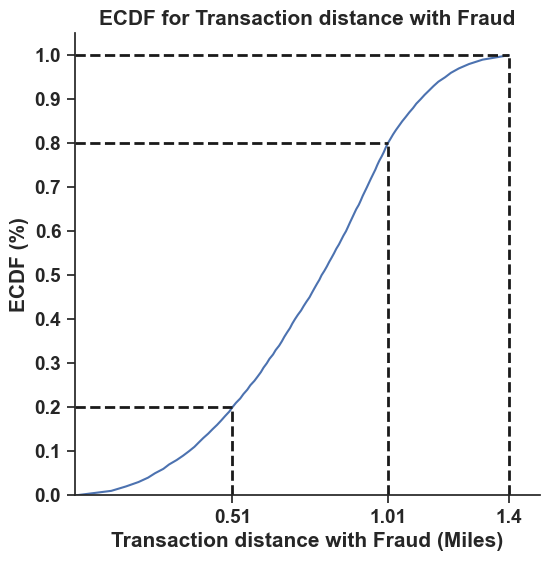

In [369]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(df_ecdf_distannce.distance_quantile, df_ecdf_distannce.percentage_list)

quantile_20 = df_ecdf_distannce.loc[0.20, 'distance_quantile']
quantile_80 = df_ecdf_distannce.loc[0.80, 'distance_quantile']
quantile_100 = df_ecdf_distannce.loc[1.0, 'distance_quantile']

ax.hlines([0.20], xmin=0, xmax=quantile_20, linestyles='--', color='k', linewidth=2)
ax.vlines([quantile_20], ymin=0, ymax=0.20, linestyles='--', color='k', linewidth=2)

ax.vlines([quantile_80], ymin=0, ymax=0.8, linestyles='--', color='k', linewidth=2)
ax.hlines([0.80], xmin=0, xmax=quantile_80, linestyles='--', color='k', linewidth=2)


ax.vlines([quantile_100], ymin=0, ymax=1.0, linestyles='--', color='k', linewidth=2)
ax.hlines([1.0], xmin=0, xmax=quantile_100, linestyles='--', color='k', linewidth=2)

ax.set_yticks(np.arange(0, 1.1, step=0.1), weight = 'bold')
ax.set_xticks([quantile_20, quantile_80, quantile_100], 
              labels=[str(round(quantile_20,2)), str(round(quantile_80,2)), str(round(quantile_100,2))], 
              weight = 'bold')


ax.set_ylim([0,1.05])
ax.set_xlim([0,1.5])
ax.set_xlabel('Transaction distance with Fraud (Miles)', weight = 'bold', fontsize=15)
ax.set_ylabel('ECDF (%)',weight = 'bold', fontsize=15)
ax.set_title("ECDF for Transaction distance with Fraud", weight = 'bold', fontsize=15)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')

# plt.legend()
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/ECDF for Transaction distance with Fraud.png',dpi=300, bbox_inches='tight')

In [370]:
df_fraud.columns

Index(['Unnamed: 0', 'index', 'transaction_time', 'account_number',
       'merchant_name', 'category', 'transaction_amount', 'first_name',
       'last_name', 'gender', 'street', 'city', 'state', 'zip',
       'client_latitude', 'client_longitude', 'city_population', 'job',
       'birthday', 'transaction_number', 'unix_time', 'merchant_latitude',
       'merchant_longitude', 'is_fraud', 'transaction_date',
       'transaction_hour', 'transaction_month', 'birthday_date', 'age',
       'transaction_longitude_distance', 'transaction_lattitude_distance',
       'transaction_distance', 'age_intervals'],
      dtype='object')

In [371]:
type(df_fraud[['category', 'transaction_amount', ]])

pandas.core.frame.DataFrame

In [372]:
df_corr = df_fraud[['category', 
                   'transaction_amount',
                   'gender',
                   'transaction_hour',
                   'age']
                  ]
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,transaction_amount,transaction_hour,age
transaction_amount,1.000000,0.361712,0.041871
transaction_hour,0.361712,1.000000,0.122257
age,0.041871,0.122257,1.000000


In [373]:
df_corr.head()

,category,transaction_amount,gender,transaction_hour,age
2449,grocery_pos,281.06,Male,1,30.0
2472,gas_transport,11.52,Female,1,58.0
2523,grocery_pos,276.31,Female,3,58.0
2546,gas_transport,7.03,Male,3,30.0
2553,grocery_pos,275.73,Female,3,58.0
